# CS207 Final Project Presentation - Group 4

## Library installation

It's super easy to install our library. Just one-line pip command:
```bash
pip install pychemkin

```

If you want to run tests, do the following:
```bash

git clone https://github.com/cs207group4/cs207-FinalProject.git

cd cs207-FinalProject

python setup.py test

```

## Basic Requirements

The basic requirements are implemented same as in milestone 1 and 2. Except that we are using a bigger NASA database now. The following example uses an xml file containing irreversible reactions, reversible reactions and new NASA species.

Our `chemkin` class can handle three different types of reaction coefficients, irreversible reactions and reversible reactions with species specified in NASA database.

In [1]:
import numpy as np
from pychemkin import chemkin, ChemSolver, ChemViz, simpleIO
rxnsystem = chemkin('demo_xml/demo.xml')

print(rxnsystem.summary())

Finished reading xml input file
chemical equations:
[
C + H [=] CH
CH + CH3 + CH3 [=] C3H7
OH + OH =] HO2 + H
CH3 =] H + H + CH
O2 + CH =] HO2 + C
]
species: ['H', 'OH', 'O2', 'HO2', 'C', 'CH', 'CH3', 'C3H7']
reversible: [ True  True False False False]


In [2]:
T = 1500 #temperature in K
x = np.ones(8)
print("Progress rates")
print(rxnsystem.progress_rate(x,T))
print("Reaction rates")
print(rxnsystem.reaction_rate(x,T))

Progress rates
[  1.81881759e+12   1.52699256e+14   1.02542530e+13   1.55398795e+13
   6.91351212e+13]
Reaction rates
[  3.95151944e+13  -2.05085060e+13  -6.91351212e+13   7.93893742e+13
   6.73163036e+13  -2.04475681e+14  -3.20938392e+14   1.52699256e+14]


## Chemkin Solver

We implemented a `ChemSolver` class that ...(insert presentation scripts here...)

In [3]:
# Solve an ODE
x_init = np.ones(8)
T = 1000

# integration end time
t_max = 5.e-13

# step size
dt = 1.e-16

cs = ChemSolver(chemkin('demo_xml/demo.xml')).solve(x_init, T, t_max, dt)

Finished reading xml input file


In [4]:
# what's the result like - returns (time, concentration, reaction_rate)
cs.get_results()

(array([  0.00000000e+00,   1.00000000e-16,   2.00000000e-16, ...,
          4.99700000e-13,   4.99800000e-13,   4.99900000e-13]),
 array([[  1.00000000e+00,   1.00325822e+00,   1.00647891e+00, ...,
           8.26670028e-01,   8.26579041e-01,   8.26488078e-01],
        [  1.00000000e+00,   9.99031963e-01,   9.98065799e-01, ...,
           1.71175230e-01,   1.71146842e-01,   1.71118465e-01],
        [  1.00000000e+00,   9.93225497e-01,   9.86564355e-01, ...,
          -5.39377464e-14,  -5.49187615e-14,  -5.59179299e-14],
        ..., 
        [  1.00000000e+00,   9.89862168e-01,   9.79988834e-01, ...,
           1.51668627e+00,   1.51679196e+00,   1.51689762e+00],
        [  1.00000000e+00,   9.88358351e-01,   9.77066515e-01, ...,
           1.12134402e-04,   1.11965734e-04,   1.11797319e-04],
        [  1.00000000e+00,   1.00507344e+00,   1.00998060e+00, ...,
           1.29581710e+00,   1.29581710e+00,   1.29581710e+00]]),
 array([[  3.27729812e+13,   3.23924469e+13,   3.20226980e+13

In [5]:
# result as a dataframe
df = cs.to_df()
df.head()

,t,H-Concentration,OH-Concentration,O2-Concentration,HO2-Concentration,C-Concentration,CH-Concentration,CH3-Concentration,C3H7-Concentration,H-Reaction_rate,OH-Reaction_rate,O2-Reaction_rate,HO2-Reaction_rate,C-Reaction_rate,CH-Reaction_rate,CH3-Reaction_rate,C3H7-Reaction_rate,T
0,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.277298e+13,-9.689748e+12,-6.832225e+13,7.316712e+13,6.617938e+13,-1.027354e+14,-1.182185e+14,5.159149e+13,1000.0
1,1.000000e-16,1.003258,0.999032,0.993225,1.007259,1.006559,0.989862,0.988358,1.005073,3.239245e+13,-9.670997e+12,-6.717145e+13,7.200695e+13,6.500751e+13,-1.000334e+14,-1.146331e+14,4.988634e+13,1000.0
2,2.000000e-16,1.006479,0.998066,0.986564,1.014403,1.013003,0.979989,0.977067,1.009981,3.202270e+13,-9.652300e+12,-6.605545e+13,7.088160e+13,6.387067e+13,-9.744668e+13,-1.112240e+14,4.826668e+13,1000.0
3,3.000000e-16,1.009663,0.997102,0.980013,1.021436,1.019334,0.970370,0.966109,1.014729,3.166325e+13,-9.633657e+12,-6.497276e+13,6.978959e+13,6.276736e+13,-9.496838e+13,-1.079798e+14,4.672692e+13,1000.0
4,4.000000e-16,1.012812,0.996139,0.973569,1.028361,1.025557,0.960993,0.955467,1.019328,3.131356e+13,-9.615069e+12,-6.392179e+13,6.872932e+13,6.169600e+13,-9.259162e+13,-1.048890e+14,4.526153e+13,1000.0


In [6]:
# Is equilibrium reached at the end time of the reaction?
cs.is_equilibrium()

False

In [7]:
# save solved result as a csv file or an HDF5 file
cs.save_results('result.csv')
cs.save_results('result.h5')

In [8]:
# Grid search for parameters
cs.grid_search([np.ones(8)], [500,1000,1500], t_max, dt).get_grid_results()

([[500, 1000, 1500], [array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])]],
 {500: [(array([  0.00000000e+00,   1.00000000e-16,   2.00000000e-16, ...,
             4.99700000e-13,   4.99800000e-13,   4.99900000e-13]),
    array([[  1.00000000e+00,   1.00254762e+00,   1.00508467e+00, ...,
              1.02175902e+00,   1.02169095e+00,   1.02162290e+00],
           [  1.00000000e+00,   9.99774842e-01,   9.99549785e-01, ...,
              4.70506371e-01,   4.70456520e-01,   4.70406680e-01],
           [  1.00000000e+00,   9.93446120e-01,   9.86972129e-01, ...,
             -4.98436221e-14,  -4.80602127e-14,  -4.63225756e-14],
           ..., 
           [  1.00000000e+00,   9.94290680e-01,   9.88668968e-01, ...,
              2.24712410e+00,   2.24721926e+00,   2.24731438e+00],
           [  1.00000000e+00,   9.97040402e-01,   9.94103303e-01, ...,
              5.28660499e-04,   5.27940031e-04,   5.27220546e-04],
           [  1.00000000e+00,   1.00079988e+00,   1.00159053e+00, ...,
       

In [9]:
# load from file -- csv or hdf5. Useful when solving ODE takes long time
cs = ChemSolver(chemkin('demo_xml/demo.xml')).load_results('result.csv')
cs.to_df().head()

Finished reading xml input file


,t,H-Concentration,OH-Concentration,O2-Concentration,HO2-Concentration,C-Concentration,CH-Concentration,CH3-Concentration,C3H7-Concentration,H-Reaction_rate,OH-Reaction_rate,O2-Reaction_rate,HO2-Reaction_rate,C-Reaction_rate,CH-Reaction_rate,CH3-Reaction_rate,C3H7-Reaction_rate,T
0,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.277298e+13,-9.689748e+12,-6.832225e+13,7.316712e+13,6.617938e+13,-1.027354e+14,-1.182185e+14,5.159149e+13,1000.0
1,1.000000e-16,1.003258,0.999032,0.993225,1.007259,1.006559,0.989862,0.988358,1.005073,3.239245e+13,-9.670997e+12,-6.717145e+13,7.200695e+13,6.500751e+13,-1.000334e+14,-1.146331e+14,4.988634e+13,1000.0
2,2.000000e-16,1.006479,0.998066,0.986564,1.014403,1.013003,0.979989,0.977067,1.009981,3.202270e+13,-9.652300e+12,-6.605545e+13,7.088160e+13,6.387067e+13,-9.744668e+13,-1.112240e+14,4.826668e+13,1000.0
3,3.000000e-16,1.009663,0.997102,0.980013,1.021436,1.019334,0.970370,0.966109,1.014729,3.166325e+13,-9.633657e+12,-6.497276e+13,6.978959e+13,6.276736e+13,-9.496838e+13,-1.079798e+14,4.672692e+13,1000.0
4,4.000000e-16,1.012812,0.996139,0.973569,1.028361,1.025557,0.960993,0.955467,1.019328,3.131356e+13,-9.615069e+12,-6.392179e+13,6.872932e+13,6.169600e+13,-9.259162e+13,-1.048890e+14,4.526153e+13,1000.0


## Chemkin Solver Visualization

We implemented a `ChemViz` class which is built on a solved `ChemSolver` object...(insert presentation scripts here...)

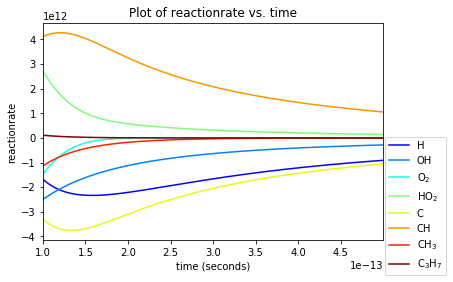

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
cv = ChemViz(cs)
cv.plot_time_series("reactionrate",tmin=1e-13)

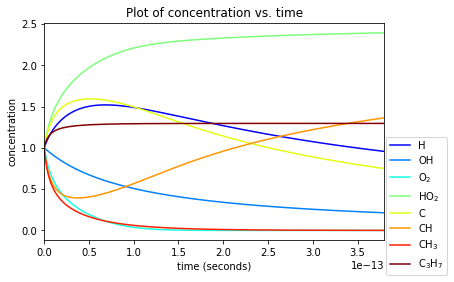

In [11]:
cv.plot_time_series("concentration",tmax=3.8e-13)

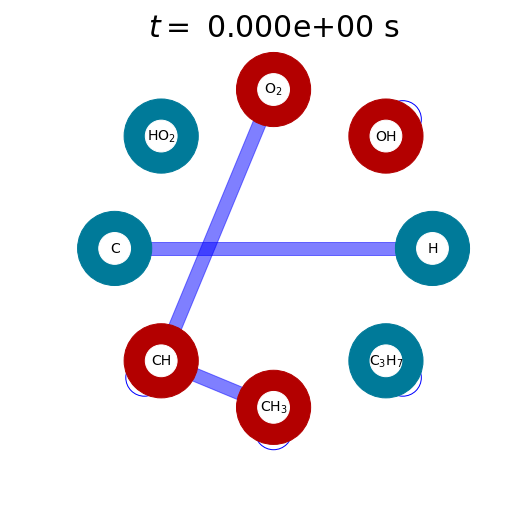

In [12]:
cv.plot_network([0])

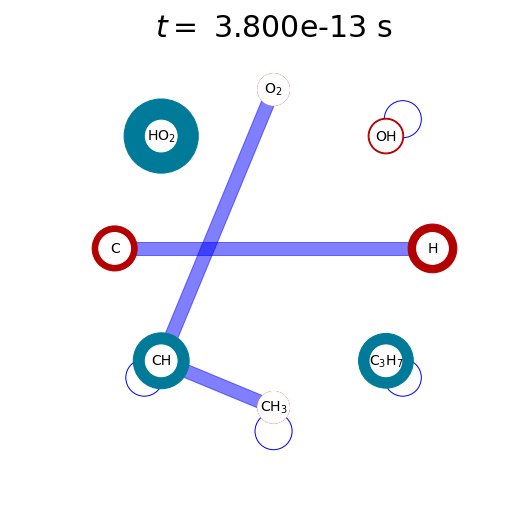

In [13]:
cv.plot_network([3.8e-13])

In [14]:
cv.html_report('report.html')

After running the above code, an HTML report will be generated as <a href="report.html" target="_blank">report.html</a>


## simpleIO

We implemented a `simpleIO` class which can save and load objects...(insert presentation scripts here...)

In [15]:
#save the ChemSolver object
simpleIO('cs.pkl').to_pickle(cs)
cs2 = simpleIO('cs.pkl').read_pickle()
cs2.to_df().head()

,t,H-Concentration,OH-Concentration,O2-Concentration,HO2-Concentration,C-Concentration,CH-Concentration,CH3-Concentration,C3H7-Concentration,H-Reaction_rate,OH-Reaction_rate,O2-Reaction_rate,HO2-Reaction_rate,C-Reaction_rate,CH-Reaction_rate,CH3-Reaction_rate,C3H7-Reaction_rate,T
0,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.277298e+13,-9.689748e+12,-6.832225e+13,7.316712e+13,6.617938e+13,-1.027354e+14,-1.182185e+14,5.159149e+13,1000.0
1,1.000000e-16,1.003258,0.999032,0.993225,1.007259,1.006559,0.989862,0.988358,1.005073,3.239245e+13,-9.670997e+12,-6.717145e+13,7.200695e+13,6.500751e+13,-1.000334e+14,-1.146331e+14,4.988634e+13,1000.0
2,2.000000e-16,1.006479,0.998066,0.986564,1.014403,1.013003,0.979989,0.977067,1.009981,3.202270e+13,-9.652300e+12,-6.605545e+13,7.088160e+13,6.387067e+13,-9.744668e+13,-1.112240e+14,4.826668e+13,1000.0
3,3.000000e-16,1.009663,0.997102,0.980013,1.021436,1.019334,0.970370,0.966109,1.014729,3.166325e+13,-9.633657e+12,-6.497276e+13,6.978959e+13,6.276736e+13,-9.496838e+13,-1.079798e+14,4.672692e+13,1000.0
4,4.000000e-16,1.012812,0.996139,0.973569,1.028361,1.025557,0.960993,0.955467,1.019328,3.131356e+13,-9.615069e+12,-6.392179e+13,6.872932e+13,6.169600e+13,-9.259162e+13,-1.048890e+14,4.526153e+13,1000.0


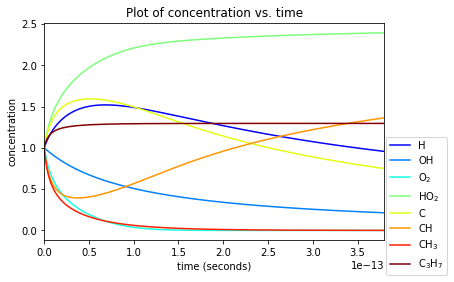

In [16]:
#save the ChemViz object
simpleIO('cv.pkl').to_pickle(cv)
cv2 = simpleIO('cv.pkl').read_pickle()
cv2.plot_time_series("concentration",tmax=3.8e-13)